In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from numpy import linalg as LA
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 16

In [121]:
L = 50
W = 200
t = 5

H = np.zeros((L,L))
for i in range(L):
    H[i,i] = (rnd.randint(-W,W))
    if i+1<L:
        H[i+1,i] = t
        H[i,i+1] = t
#print(H)

In [122]:
v,w = LA.eig(H)
print(np.sort(v))
#print(w)

[-195.26569364 -194.15465655 -190.67017484 -185.60528684 -178.2134275
 -167.16792761 -159.43009654 -156.43161784 -148.17073258 -141.90270278
 -122.74233922 -111.22734571  -98.1801279   -82.74997713  -79.79888832
  -68.3283174   -60.90901578  -42.95867062  -32.5771436   -32.30610404
    7.98855571   16.16783722   26.5482192    34.9344527    41.55149479
   45.43191897   55.4857895    57.82397      78.62879979   83.43028472
   84.85812209   85.26322793  101.74297754  104.6007512   118.18958008
  119.2550587   119.94255022  128.35865364  136.18639079  140.5653795
  142.1593174   144.18034153  144.26447585  146.2485731   147.29595128
  151.15028525  157.19659661  174.37630714  186.18704289  193.77734105]


Text(0, 0.5, 'Energy')

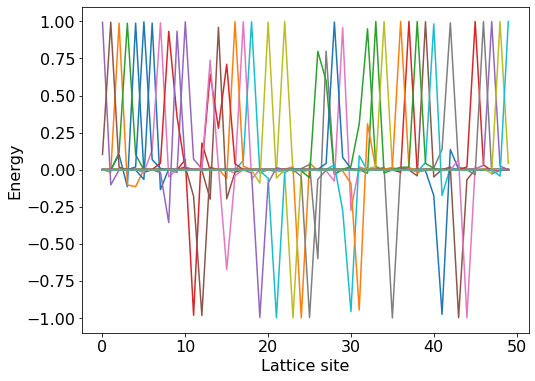

In [123]:
plt.plot(w)
plt.xlabel("Lattice site")
plt.ylabel("Energy")

Text(0, 0.5, '$E_n$')

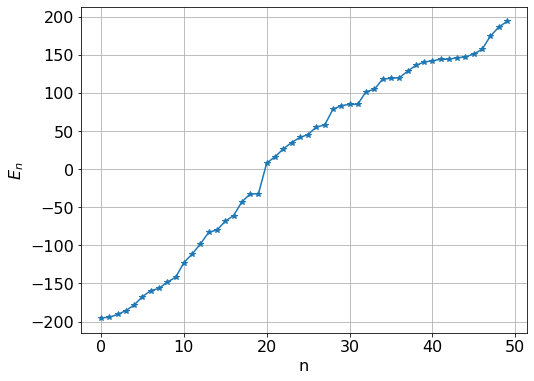

In [124]:
plt.plot(range(L),np.sort(v), "*", linestyle="-")
plt.grid()
plt.xlabel("n")
plt.ylabel("$E_n$")

Text(0, 0.5, 'Density')

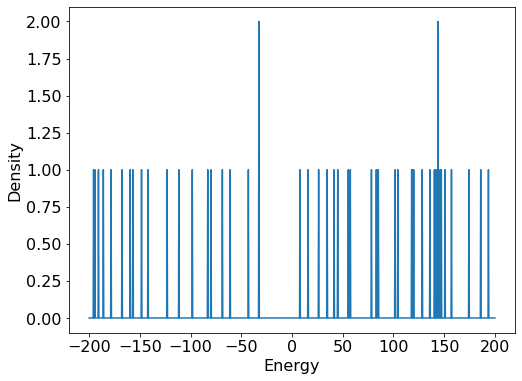

In [126]:
#density of states
E = np.linspace(-200, 200, 1000)
dos = np.zeros(len(E))
n=0
v_round = []
y = []

for i in range(L):
  v_round.append(int(v[i]))
#print(v_round)

for i in range(L):
  for j in range(len(E)-1):
    if E[j] <= v[i] < E[j+1]:
      dos[j] += 1

plt.plot(E, dos)
plt.xlabel("Energy")
plt.ylabel("Density")

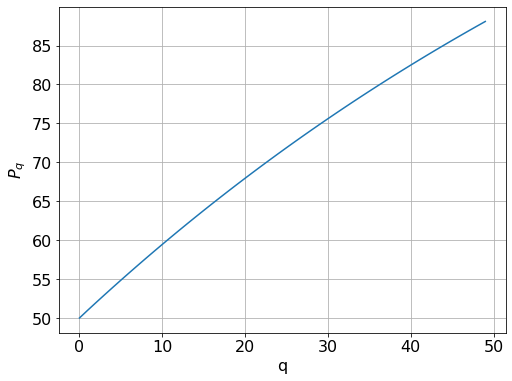

In [127]:
P = []
sum_x = 0
for q in range(50):
  vec = w[0]
  for i in range(len(vec)): 
    sum_x += vec[i]**(2*q)
  P.append(sum_x)
plt.plot(P)
plt.xlabel("q")
plt.ylabel("$P_q$")
plt.grid()

[0.07603995 0.99431223]


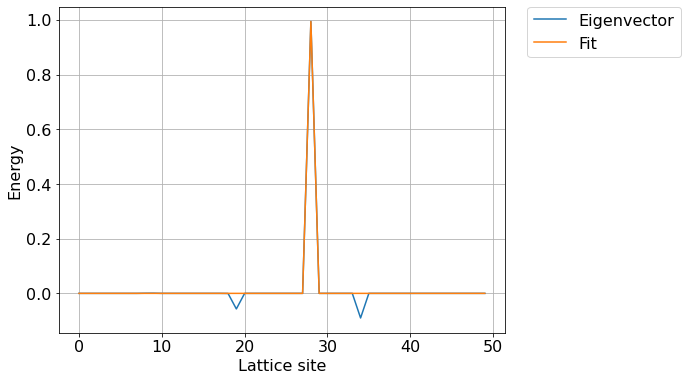

In [129]:
#find localization length
x = np.arange(L)
plt.plot(x, w[20], label = "Eigenvector")
def func(x, a, b):
    return b*np.exp(-np.abs(x-28)/a)
popt, pcov = curve_fit(func, x, w[20])
print(popt)
plt.plot(x, func(x, *popt), label = "Fit")
plt.grid()
plt.xlabel("Lattice site")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

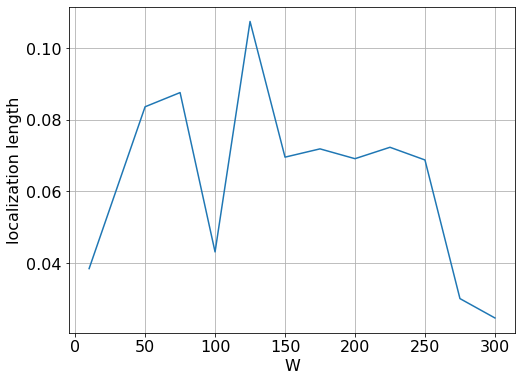

In [34]:
#fixed t changing W
W= [10, 50, 75,  100, 125, 150, 175, 200,225, 250,275, 300]
xi = [0.03842566, 0.08361162,0.08757544, 0.04309037,0.10742984, 0.0695448,0.07185787, 0.06911538,0.07230086, 0.06876018,0.03005407, 0.02464358]
plt.plot(W,xi)
plt.ylabel("localization length")
plt.xlabel("W")
plt.grid()

Part 4

In [62]:
#same value of w_i
L = 10
W = 100
t = 2

H = np.zeros((L,L))
for i in range(L):
    H[i,i] = (W)
    if i+1<L:
        H[i+1,i] = t
        H[i,i+1] = t
#print(H)

In [63]:
v,w = LA.eig(H)
print(np.sort(v))
#print(w)

[ 96.16202811  96.63498587  97.38055706  98.33833995  99.43074065
 100.56925935 101.66166005 102.61944294 103.36501413 103.83797189]


Text(0, 0.5, 'Energy')

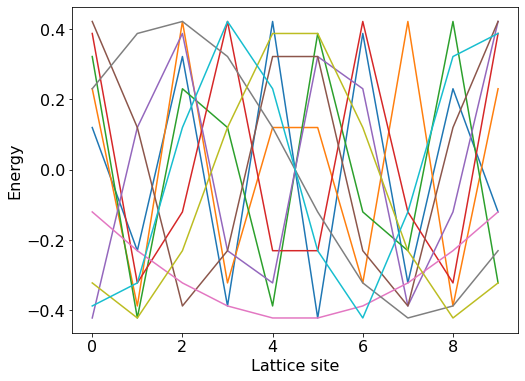

In [64]:
plt.plot(w)
plt.xlabel("Lattice site")
plt.ylabel("Energy")

Text(0, 0.5, '$E_n$')

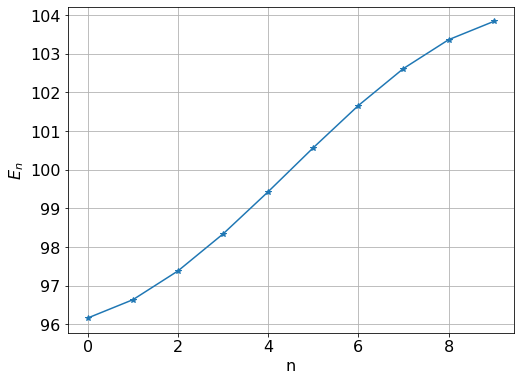

In [65]:
plt.plot(range(L),np.sort(v), "*", linestyle="-")
plt.grid()
plt.xlabel("n")
plt.ylabel("$E_n$")

Text(0, 0.5, 'Density')

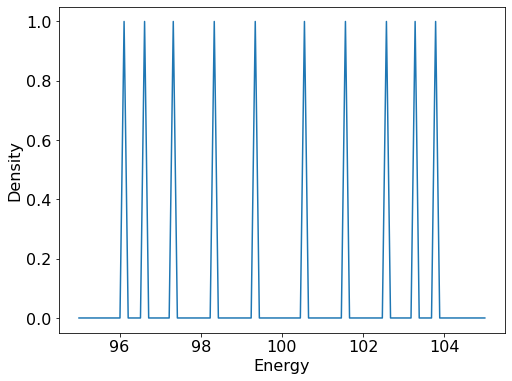

In [72]:
#density of states
E = np.linspace(95, 105, 100)
dos = np.zeros(len(E))

for i in range(L):
  for j in range(len(E)-1):
    if E[j] <= v[i] < E[j+1]:
      dos[j] += 1

plt.plot(E, dos)
plt.xlabel("Energy")
plt.ylabel("Density")

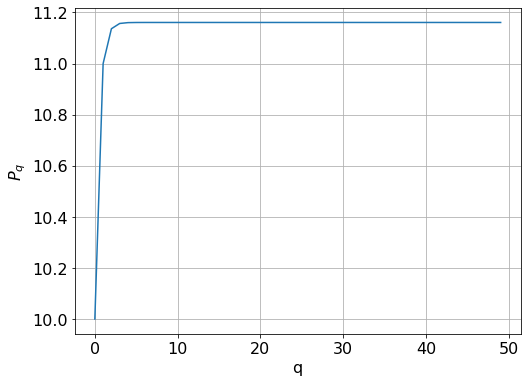

In [41]:
P = []
sum_x = 0
for q in range(50):
  vec = w[0]
  for i in range(len(vec)): 
    sum_x += vec[i]**(2*q)
  P.append(sum_x)
plt.plot(P)
plt.xlabel("q")
plt.ylabel("$P_q$")
plt.grid()

[0.34742997 0.42382809]


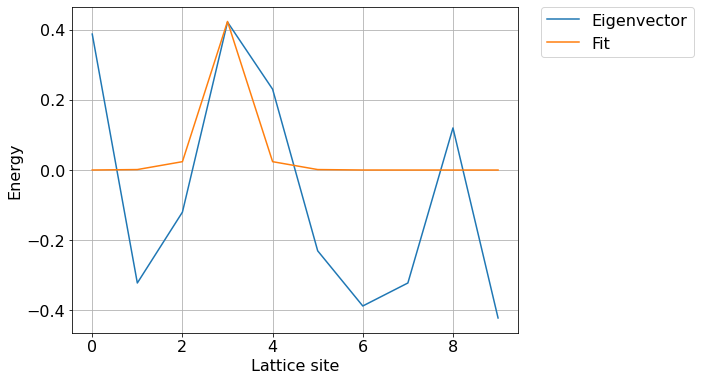

In [42]:
#find localization length
x = np.arange(L)
plt.plot(x, w[6], label = "Eigenvector")
def func(x, a, b):
    return b*np.exp(-np.abs(x-3)/a)
popt, pcov = curve_fit(func, x, w[6])
print(popt)
plt.plot(x, func(x, *popt), label = "Fit")
plt.grid()
plt.xlabel("Lattice site")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [113]:
#many times of the same thing
L = 100
W = 200
t = 10
H = np.zeros((L,L))
N = 10

for j in range(N):
    for i in range(L):
        H[i,i] = (rnd.randint(-W,W))
        if i+1<L:
            H[i+1,i] = t
            H[i,i+1] = t
    v,w = LA.eig(H)
    v+=np.sort(v)
    w+=w
v = v/N
w = w/N
print(np.sort(v))

[-38.56118653 -34.425889   -28.79854953 -28.6059132  -26.97774824
 -23.26007236 -16.216723   -14.82183793 -14.54628446 -13.1826935
 -12.50985991 -11.60960535 -11.30791847 -10.36251025  -9.54061212
  -8.77737675  -8.6327655   -8.07323499  -7.71481072  -5.25467328
  -5.18838185  -5.14378855  -5.12115445  -4.17943473  -3.87496517
  -3.64948858  -3.23187769  -2.31838658  -2.13237972  -1.29684788
  -0.81518293  -0.4481117   -0.23706065   0.57419987   1.373332
   1.66578497   1.72084292   1.85403616   1.96690783   2.70137757
   3.26936942   3.44916311   3.74800746   4.44974447   5.20017732
   5.34352448   6.33281079   6.70562094   7.39100671   7.49946013
   7.54534949   7.59807649   7.78630988   7.80801011   8.02922989
   8.11947035   8.18167169   8.21082851   8.46926828   9.34147594
  10.32911547  10.84686855  11.06097831  11.3670231   11.65367637
  13.07718103  14.09459204  14.31367707  14.91434259  14.92830498
  15.07732567  15.14763775  15.44601016  15.92984995  16.34596127
  16.39808065

Text(0, 0.5, '$E_n$')

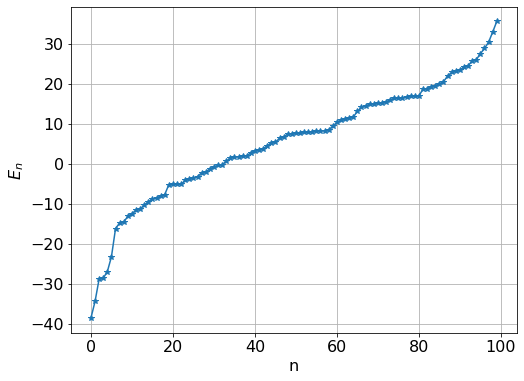

In [114]:
plt.plot(range(L),np.sort(v), "*", linestyle="-")
plt.grid()
plt.xlabel("n")
plt.ylabel("$E_n$")

Text(0, 0.5, 'Density')

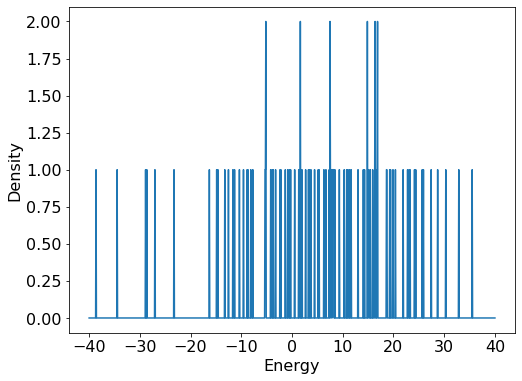

In [116]:
#density of states
E = np.linspace(-40, 40, 1000)
dos = np.zeros(len(E))
n=0
v_round = []
y = []

for i in range(L):
  v_round.append(int(v[i]))
#print(v_round)

for i in range(L):
  for j in range(len(E)-1):
    if E[j] <= v[i] < E[j+1]:
      dos[j] += 1

plt.plot(E, dos)
plt.xlabel("Energy")
plt.ylabel("Density")

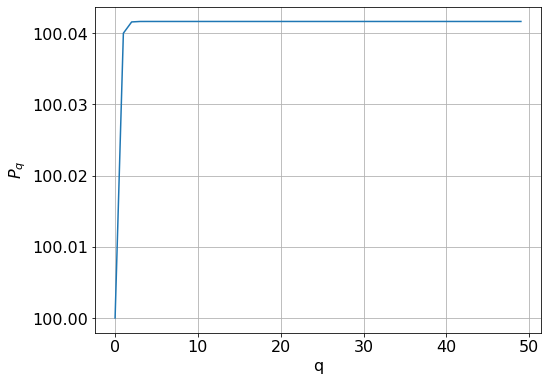

In [117]:
P = []
sum_x = 0
for q in range(50):
  vec = w[0]
  for i in range(len(vec)): 
    sum_x += vec[i]**(2*q)
  P.append(sum_x)
plt.plot(P)
plt.xlabel("q")
plt.ylabel("$P_q$")
plt.grid()

[0.3507627  0.19809689]


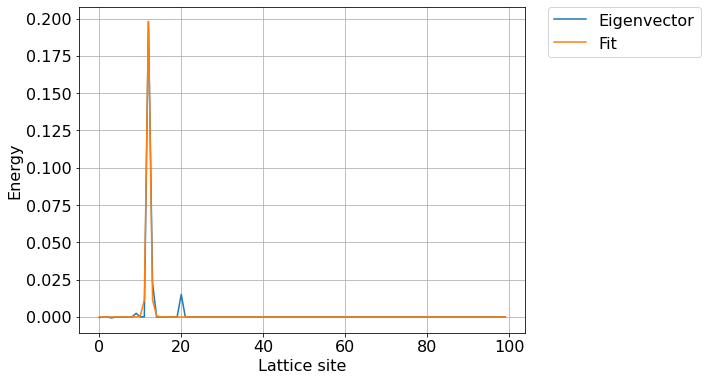

In [119]:
#find localization length
x = np.arange(L)
plt.plot(x, w[6], label = "Eigenvector")
def func(x, a, b):
    return b*np.exp(-np.abs(x-12)/a)
popt, pcov = curve_fit(func, x, w[6])
print(popt)
plt.plot(x, func(x, *popt), label = "Fit")
plt.grid()
plt.xlabel("Lattice site")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)